# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score, r2_score, accuracy_score, roc_auc_score, precision_score, recall_score, mean_squared_error, root_mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB

# Read Data

In [2]:
data = pd.read_csv("Data/Calories.csv")
data

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


# Simple Cleaning

In [3]:
data = data.drop(columns="User_ID")
data

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [4]:
data_out = data.pop("Calories")
data["Calories"] = data_out
data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


# EDA

In [5]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [6]:
data.dtypes

Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [7]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [10]:
data.info

<bound method DataFrame.info of        Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0        male   68   190.0    94.0      29.0       105.0       40.8     231.0
1      female   20   166.0    60.0      14.0        94.0       40.3      66.0
2        male   69   179.0    79.0       5.0        88.0       38.7      26.0
3      female   34   179.0    71.0      13.0       100.0       40.5      71.0
4      female   27   154.0    58.0      10.0        81.0       39.8      35.0
...       ...  ...     ...     ...       ...         ...        ...       ...
14995  female   20   193.0    86.0      11.0        92.0       40.4      45.0
14996  female   27   165.0    65.0       6.0        85.0       39.2      23.0
14997  female   43   159.0    58.0      16.0        90.0       40.1      75.0
14998    male   78   193.0    97.0       2.0        84.0       38.3      11.0
14999    male   63   173.0    79.0      18.0        92.0       40.5      98.0

[15000 rows x 8 columns]>

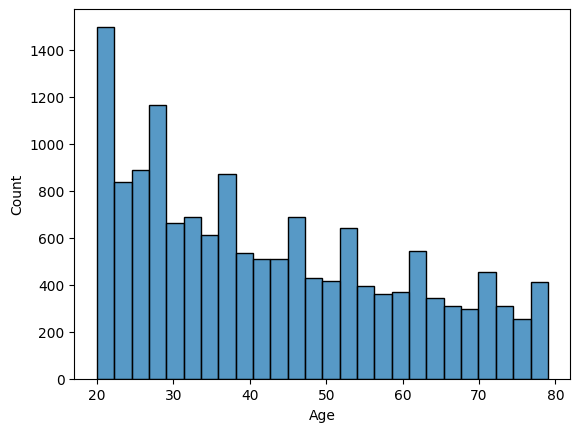

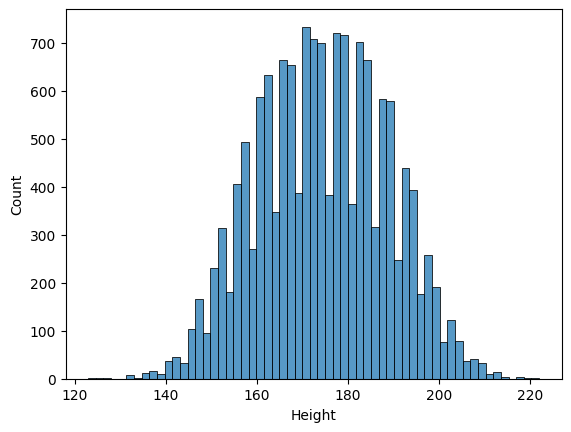

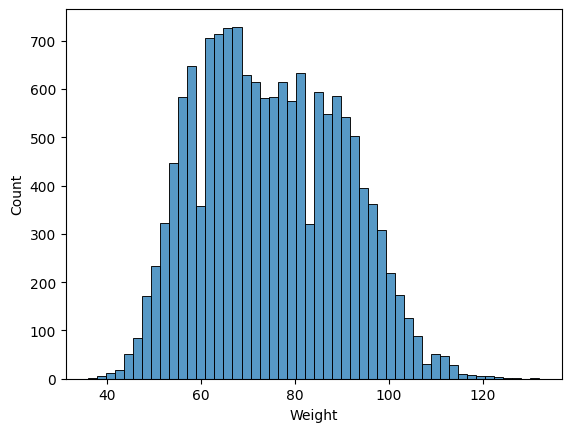

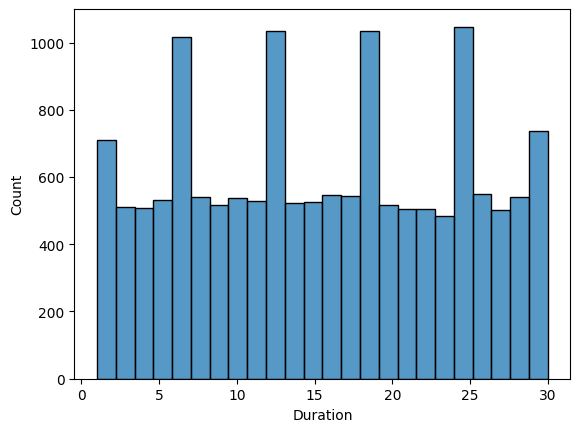

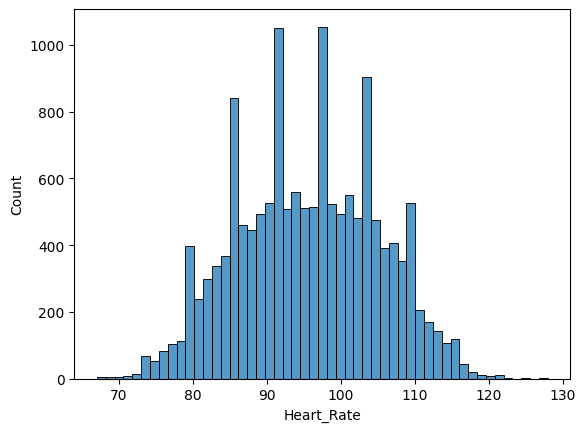

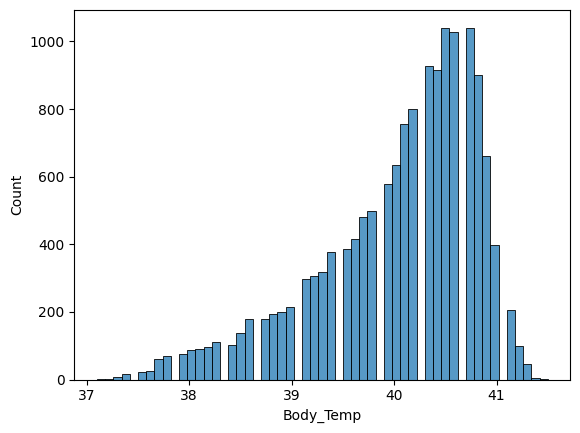

In [11]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        sns.histplot(data=data, x=column)
        plt.show()

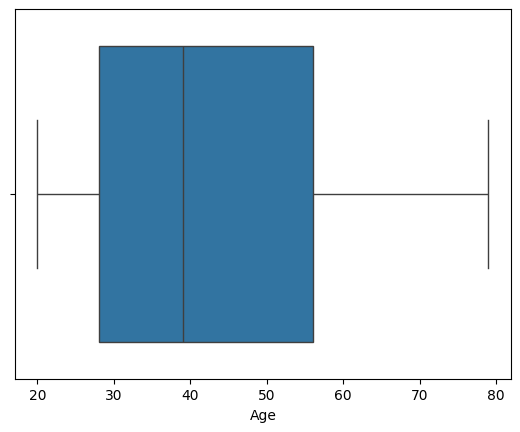

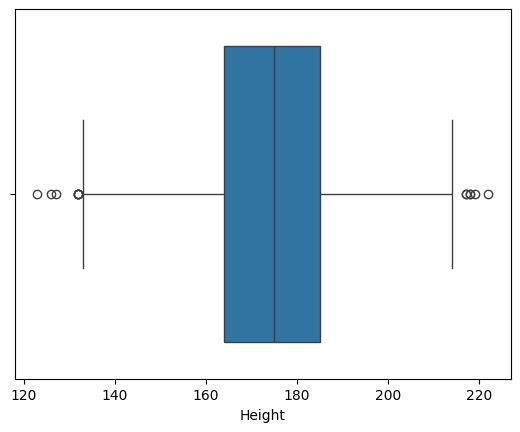

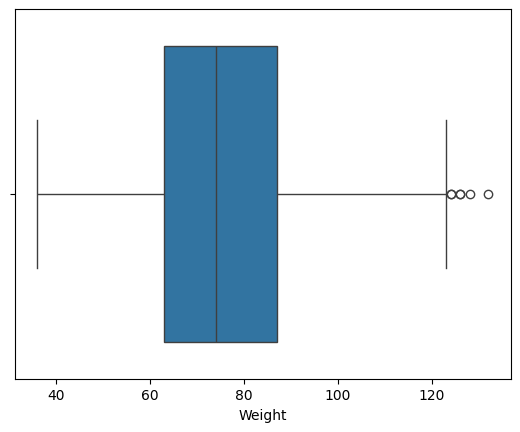

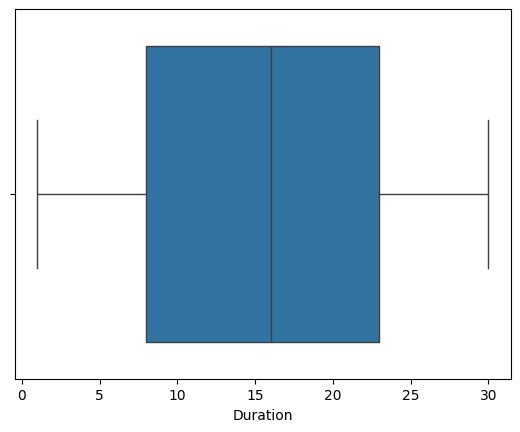

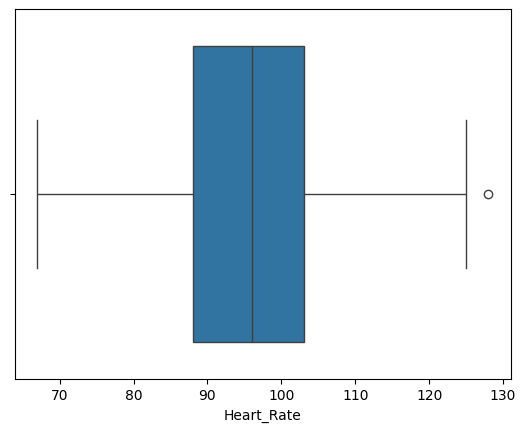

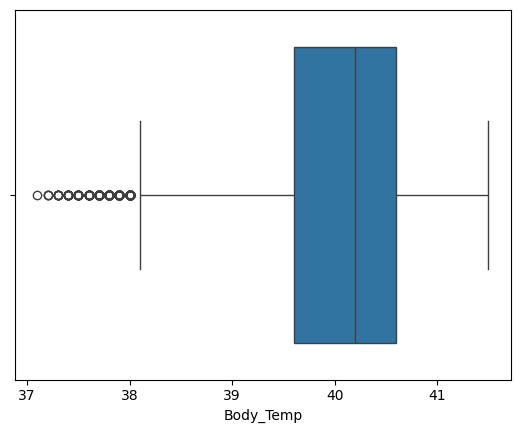

In [12]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        sns.boxplot(data=data, x=column)
        plt.show()

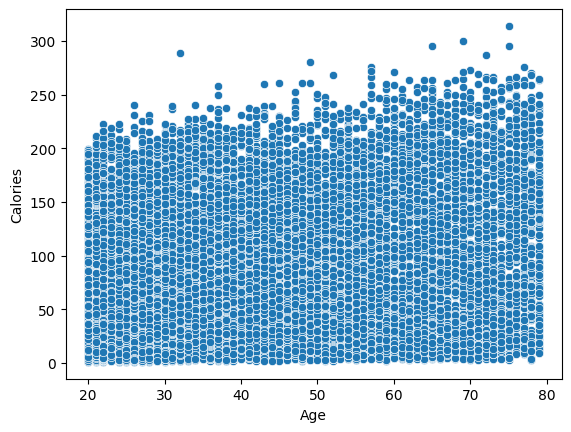

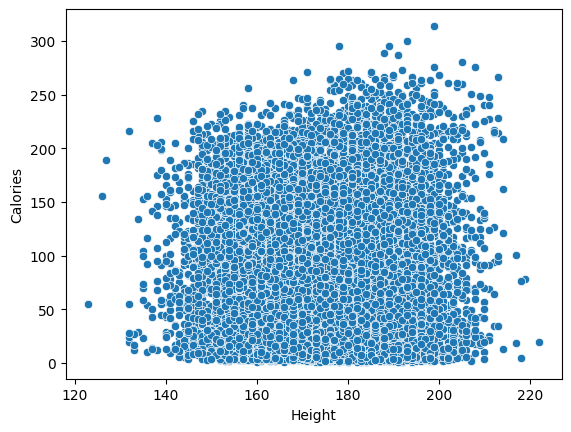

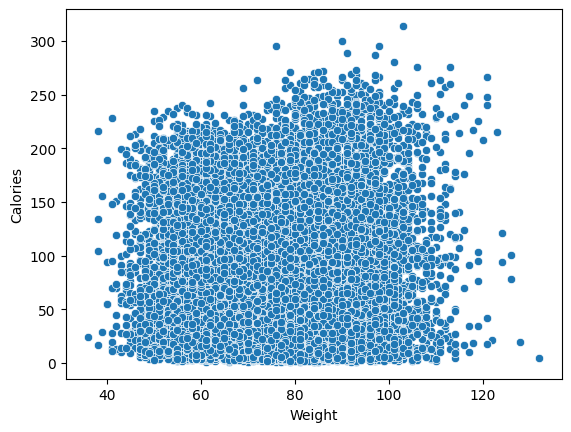

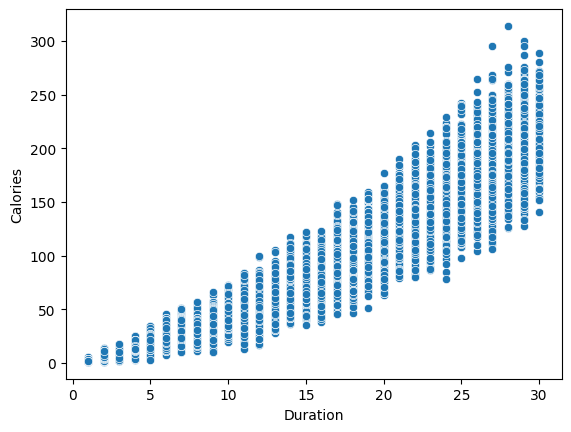

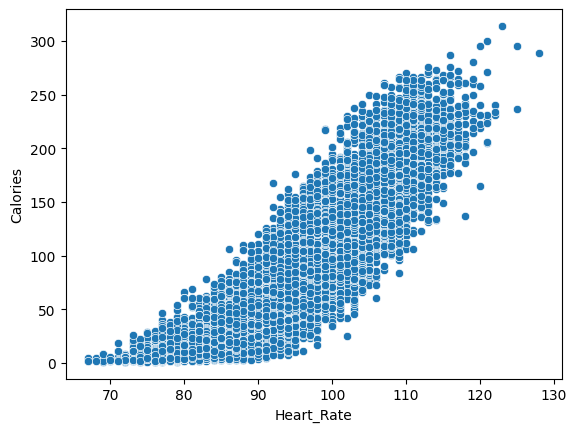

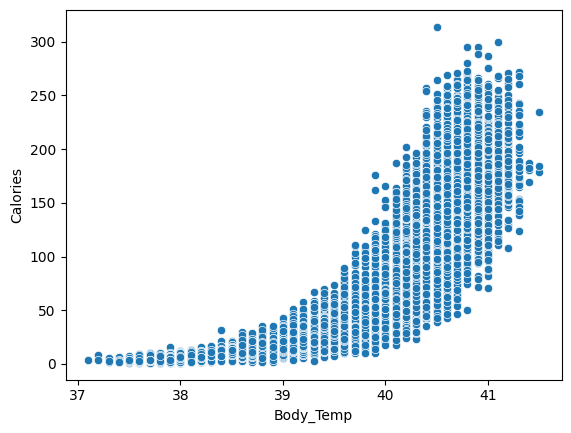

In [13]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        sns.scatterplot(data=data, x=column, y="Calories")
        plt.show()

In [14]:
for column in data.columns[:-1]:
    if (data[column].dtype != "object"):
        print (f"{column}: Skewness: {data[column].skew()}, Kurtosis: {data[column].kurt()}")

Age: Skewness: 0.47338270096138746, Kurtosis: -0.9491304391648785
Height: Skewness: -0.006189620437893538, Kurtosis: -0.5132103434138231
Weight: Skewness: 0.22672530725814513, Kurtosis: -0.6820567382751981
Duration: Skewness: 0.0047505366680978415, Kurtosis: -1.1847510258856375
Heart_Rate: Skewness: -0.01070407972854895, Kurtosis: -0.6442197983992131
Body_Temp: Skewness: -0.9943824155974582, Kurtosis: 0.5173064087117121


Skewness -> Mendekati 0 berarti bagus
<br>
Kurtosis -> Mendekati 3 berarti juga

# Data Preprocessing

### Drop NA Data Above 50%

In [15]:
data.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [16]:
missing_values = data.isna().sum() / len(data)
missing_values

Gender        0.0
Age           0.0
Height        0.0
Weight        0.0
Duration      0.0
Heart_Rate    0.0
Body_Temp     0.0
Calories      0.0
dtype: float64

In [17]:
for key, value in missing_values.items():
    if (value > 0.5):
        data = data.pop(columns = key)

### Fill NA
Numeric -> Using Median
<br>
Object -> Using Mode

In [18]:
for column in data.columns[:-1]:
    if (data[column].isna().any()):
        if (data[column].dtype == "object"):
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            data[column] = data[column].fillna(data[column].median())

### Encoding

In [19]:
encoder = LabelEncoder()
encoded = {}

for column in data.columns[:-1]:
    if (data[column].dtype == "object"):
        data[column] = encoder.fit_transform(data[column])
        encoded[column] = {i:class_name for i, class_name in enumerate(encoder.classes_)}

In [20]:
encoded

{'Gender': {0: 'female', 1: 'male'}}

In [21]:
for key, value in encoded.items():
    print (f"{key}: {value}")

Gender: {0: 'female', 1: 'male'}


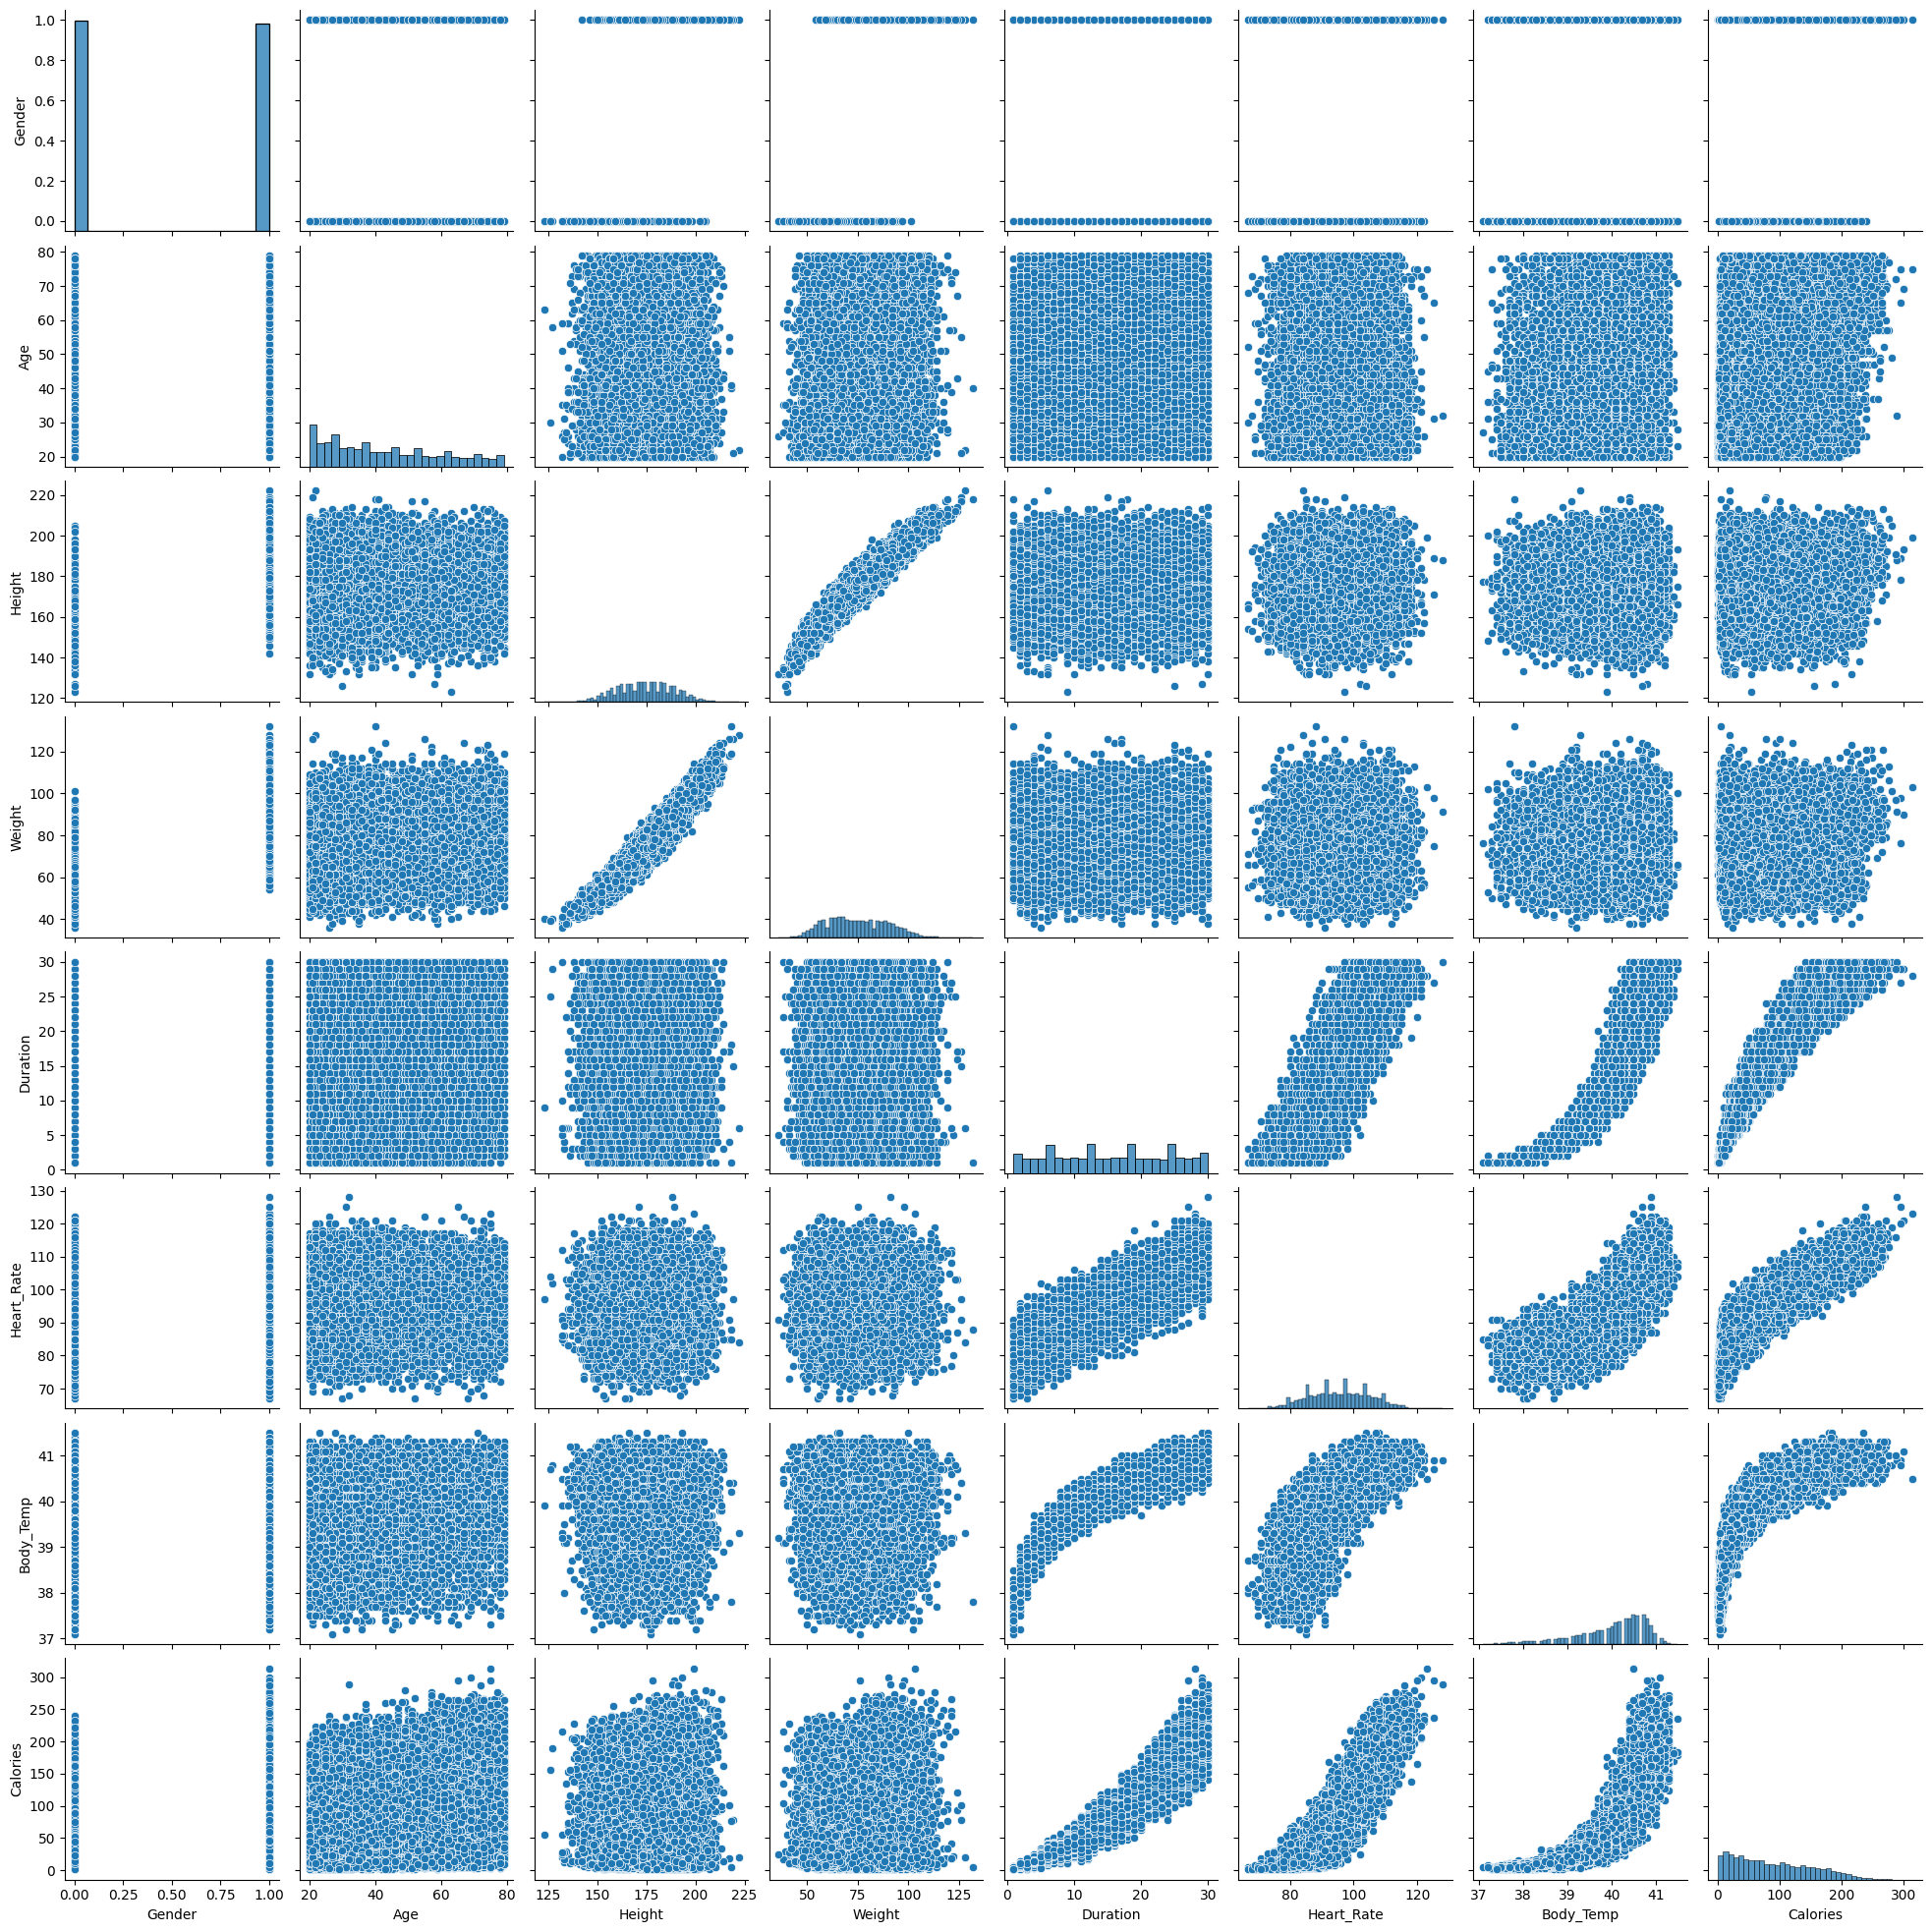

In [22]:
sns.pairplot(data=data)

<Axes: >

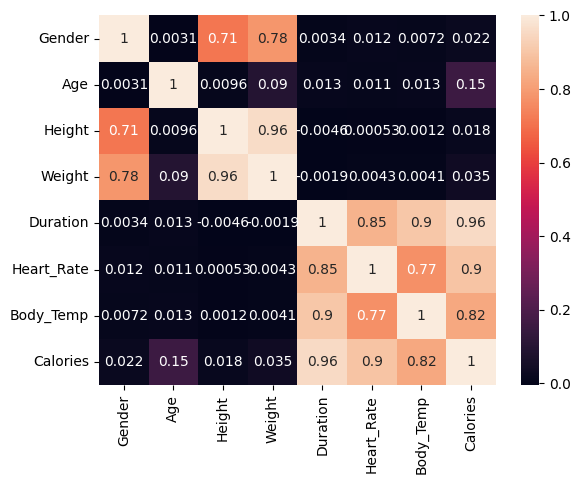

In [23]:
sns.heatmap(data=data[:-1].corr(), annot=True)

# Modelling

In [24]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [25]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [26]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X=x_train, y=y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

In [30]:
y_pred

array([ 30.77503745, 223.91854533,  49.78311907, ...,  71.90018037,
       154.0538167 , 181.59160385])

# Evaluation

In [31]:
mse = mean_squared_error(y_pred, y_test)
rmse = root_mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2: {r2}")

MSE: 127.46217901532042
RMSE: 11.289914925070091
R2: 0.965383759020866


# Regularization

### Rigde and Lasso

In [ ]:
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)

ridge.fit(X=x_train, y=y_train)
lasso.fit(X=x_train, y=y_train)

Lasso(alpha=1)

In [33]:
y_pred_ridge = ridge.predict(x_test)
y_pred_lasso = lasso.predict(x_test)

### Evaluate Ridge

In [34]:
mse = mean_squared_error(y_pred_ridge, y_test)
rmse = root_mean_squared_error(y_pred_ridge, y_test)
r2 = r2_score(y_pred_ridge, y_test)

print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2: {r2}")

MSE: 127.46442998566573
RMSE: 11.290014614058997
R2: 0.9653826776696204


### Evaluate Lasso

In [35]:
mse = mean_squared_error(y_pred_lasso, y_test)
rmse = root_mean_squared_error(y_pred_lasso, y_test)
r2 = r2_score(y_pred_lasso, y_test)

print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2: {r2}")

MSE: 140.49006847655014
RMSE: 11.852850647694424
R2: 0.9613488095701914


In [36]:
y_train_pred = model.predict(x_train)
y_train_pred

array([113.09448578, 107.93635252, 101.14029087, ..., 104.52489866,
        48.49602034,  25.23317845])

In [37]:
train_mse = mean_squared_error(y_train_pred, y_train)
train_mse

128.05404814878875

In [38]:
if (train_mse < mse):
    print (f"Model Overfitting")
else:
    print (f"Model normal dan tidak overfitting")

Model Overfitting


# Scaling

In [39]:
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [40]:
def Scaling (x1, x2, y1, y2, scaler_x, scaler_y):
    x1 = scaler_x.fit_transform(x1)
    x2 = scaler_x.transform(x2)

    y1 = scaler_y.fit_transform(y1)
    y2 = scaler_y.transform(y2)

    return x1, x2, y1, y2, scaler_x, scaler_y

In [41]:
scaler_min_x, scaler_min_y = MinMaxScaler(), MinMaxScaler()
scaler_standard_x, scaler_standard_y = StandardScaler(), StandardScaler()

In [42]:
x_train1, x_test_1, y_train_1, y_test_1, scaler_min_x, scaler_min_y = Scaling(x_train, x_test, y_train, y_test, scaler_min_x, scaler_min_y)

In [43]:
x_train2, x_test_2, y_train_2, y_test_2, scaler_standard_x, scaler_standard_y = Scaling(x_train, x_test, y_train, y_test, scaler_standard_x, scaler_standard_y)

In [44]:
model2 = LinearRegression()
model2.fit(X=x_train1, y=y_train_1)

LinearRegression()

In [45]:
model3 = LinearRegression()
model3.fit(X=x_train2, y=y_train_2)

LinearRegression()

### MinMax Scaler

In [46]:
y_pred_min_max = model2.predict(x_test_1)
y_pred_min_max

array([[0.09522004],
       [0.71252676],
       [0.15639137],
       ...,
       [0.22705643],
       [0.48936182],
       [0.57735273]])

In [47]:
mse = mean_squared_error(y_pred_min_max, y_test_1)
rmse = root_mean_squared_error(y_pred_min_max, y_test_1)
r2 = r2_score(y_pred_min_max, y_test_1)

print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2: {r2}")

MSE: 0.0013026702490153677
RMSE: 0.03609252345036805
R2: 0.9653764211693057


In [48]:
y_pred_standard = model3.predict(x_test_2)
y_pred_standard

array([[-0.94329347],
       [ 2.14004418],
       [-0.6377535 ],
       ...,
       [-0.28479408],
       [ 1.02537486],
       [ 1.46487387]])

In [49]:
mse = mean_squared_error(y_pred_standard, y_test_2)
rmse = root_mean_squared_error(y_pred_standard, y_test_2)
r2 = r2_score(y_pred_standard, y_test_2)

print (f"MSE: {mse}")
print (f"RMSE: {rmse}")
print (f"R2: {r2}")

MSE: 0.03249934794017852
RMSE: 0.18027575527557366
R2: 0.9653764211693057


# Logistic Regression and Naive Bayes (Bonus - Testing)

In [ ]:
logisticModel = LogisticRegression()
naiveBayesModel = GaussianNB()

logisticModel.fit(X=x_train, y=y_train)
naiveBayesModel.fit(X=x_train, y=y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when

GaussianNB()

In [54]:
y_pred_logistic = logisticModel.predict(x_test)
y_pred_logistic

array([ 28., 165.,  38., ...,  91., 137., 179.])

In [58]:
mse = mean_squared_error(y_pred_logistic, y_test)
rmse = root_mean_squared_error(y_pred_logistic, y_test)
matrix = confusion_matrix(y_pred_logistic, y_test)
report= classification_report(y_pred_logistic, y_test)

print (f"{matrix}")

print (f"{report}")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00        22
         3.0       0.00      0.00      0.00        20
         4.0       0.39      0.35      0.37        20
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         2
         7.0       0.75      0.15      0.26       156
         8.0       0.00      0.00      0.00         5
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00         0
        11.0       0.07      0.02      0.04        84
        12.0       0.00      0.00      0.00         0
        13.0       0.07      0.10      0.09        29
        14.0       0.14      0.04      0.06        56
        15.0       0.00      0.00      0.00         1
        16.0   

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{